# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [1]:
import os
import pandas as pd

In [2]:
x=[]
      
for n in range(1995,2017):
    if n<2000:
        skip=3
    else:
        skip=2
    filename='Precio_Bolsa_Nacional_($kwh)_'+str(n)
    if n>= 2016:
        filename+='.xls'
    else:
        filename+='.xlsx'
        
    y=pd.read_excel(filename,skiprows=skip,parse_cols=24)
    x.append(y)

z=pd.concat(x)

len(z)
index=list(range(0,len(z)))
z.index = index


**2.--** Compute e imprima el número de registros con datos faltantes.

In [3]:
r=len(z)-len(z.dropna())
r

28

**3.--** Compute e imprima el número de registros duplicados.

In [4]:
m=z[z.duplicated()]
len(m)

67

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [5]:
print(len(z))
m2=z.dropna()
print(len(m2))
m3=m2.drop_duplicates()
print(len(m3))
m3.head(2)

7919
7891
7832


,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
1,1995-07-21,1.073,1.000,1.0,1.0,1.0,1.000,5.000,6.000,6.000,...,5.000,1.0,1.0,5.0,12.000,16.67,11.929,5.000,1.000,1.000
2,1995-07-22,1.073,1.073,1.0,1.0,1.0,1.073,1.303,1.303,1.303,...,1.073,1.0,1.0,1.0,1.303,2.50,2.500,1.303,1.073,1.073


**5.--** Compute y grafique el precio primedio diario.

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

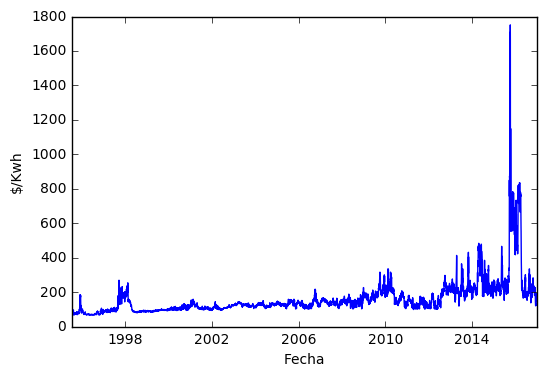

,Fecha,0,1,2,3,4,5,6,7,8,...,23,mean,dia,mes,año,key,max,min,idxmax,idxmin
0,1995-07-21,1.073,1.000,1.0,1.0,1.0,1.000,5.000,6.000,6.000,...,1.000,72.028464,4,7,1995,1995-07,16.670,1.0,19,1
1,1995-07-22,1.073,1.073,1.0,1.0,1.0,1.073,1.303,1.303,1.303,...,1.073,68.665598,5,7,1995,1995-07,2.500,1.0,19,2
2,1995-07-23,1.073,1.000,1.0,1.0,1.0,1.000,0.100,1.000,1.000,...,1.000,68.140398,6,7,1995,1995-07,1.238,0.1,12,6


In [122]:
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

m4=m3
m4['mean']=m3.mean(axis=1)

st=pd.to_datetime(m3['Fecha'],infer_datetime_format=True)
m4['Fecha']=st
m4['dia']=st.dt.dayofweek
m4['mes']=st.dt.month
m4['año']=st.dt.year



plt.plot(m4['Fecha'],m4['mean'])
plt.xlabel("Fecha")
plt.ylabel("$/Kwh")
plt.show()

m4.head(3)

**6.--** Compute y grafique el precio máximo por mes.

In [7]:
w = []
m5=m4
for n in range(len(m3['Fecha'])):
    w.append(str(m3.iloc[n,0])[0:7])

m5['key']=w
m5.head()

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Fecha,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,mean,dia,mes,año,key
1,1995-07-21,1.073,1.000,1.000,1.00,1.00,1.000,5.000,6.000,6.000,...,16.670,11.929,5.000,1.000,1.000,4.924333,4,7,1995,1995-07
2,1995-07-22,1.073,1.073,1.000,1.00,1.00,1.073,1.303,1.303,1.303,...,2.500,2.500,1.303,1.073,1.073,1.269500,5,7,1995,1995-07
3,1995-07-23,1.073,1.000,1.000,1.00,1.00,1.000,0.100,1.000,1.000,...,1.238,1.238,1.238,1.073,1.000,0.953083,6,7,1995,1995-07
4,1995-07-24,1.000,1.000,0.990,1.00,1.00,1.073,3.000,3.000,3.000,...,22.500,9.256,3.000,1.073,1.000,4.305917,0,7,1995,1995-07
5,1995-07-25,0.990,0.990,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,1.500,1.263,1.263,1.073,0.990,1.149167,1,7,1995,1995-07


C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


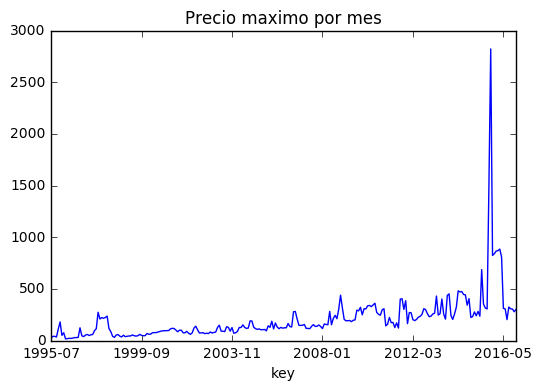

In [130]:
%matplotlib inline
y=list(m4.axes[1])
m5['max']=m4[y[1:25]].apply(max,axis=1)
b=m5.groupby('key').max()['max']
b.plot(title="Precio maximo por mes" )


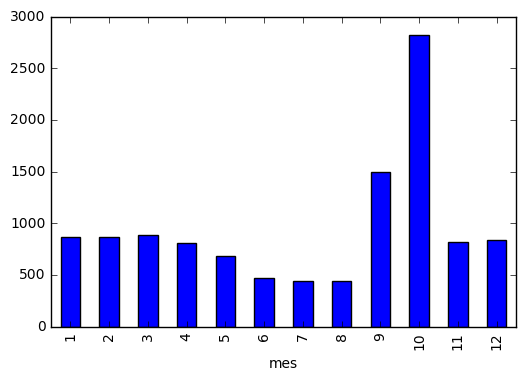

In [9]:
b2=m5.groupby('mes').max()['max']
b2.plot('bar')

**7.--** Compute y grafique el precio mínimo mensual.

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


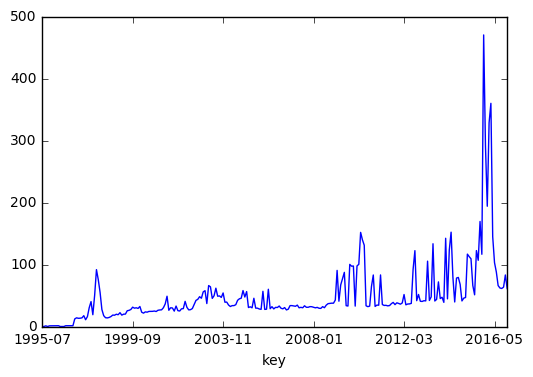

In [10]:
%matplotlib inline
m6=m5
y=list(m4.axes[1])
m6['min']=m4[y[1:25]].apply(min,axis=1)
b3=m6.groupby('key').min()['min']
b3.plot()

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

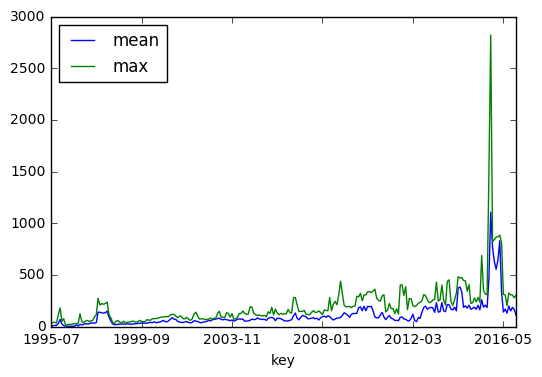

In [11]:
b4=m6.groupby('key').mean()['mean']

plt.figure()
b4.plot(legend='mean')
b.plot(legend='max')

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


dia
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
2    Axes(0.125,0.125;0.775x0.775)
3    Axes(0.125,0.125;0.775x0.775)
4    Axes(0.125,0.125;0.775x0.775)
Name: idxmax, dtype: object

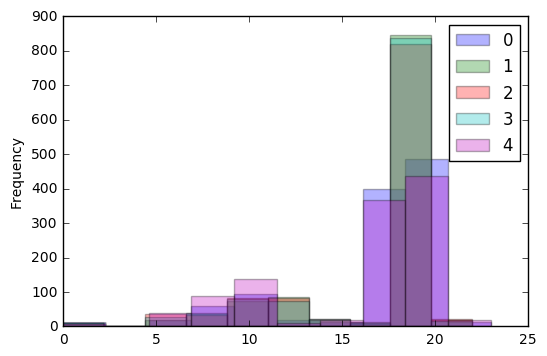

In [12]:
%matplotlib inline
m6['idxmax']=m4[y[1:25]].idxmax(axis=1)
m6['idxmax']=pd.to_numeric(m6['idxmax'])
b7=m6[m6['dia']<5]
b8=b7.groupby('dia')['idxmax']
b8.plot.hist(alpha=0.3,legend=True)



**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

dia
5    Axes(0.125,0.125;0.775x0.775)
Name: idxmax, dtype: object

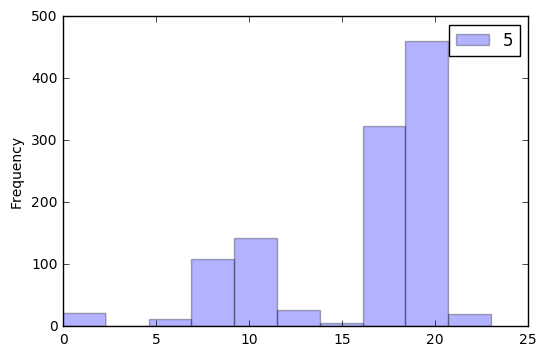

In [13]:
b9=m6[m6['dia']==5]
b10=b9.groupby('dia')['idxmax']
b10.plot.hist(alpha=0.3,legend=True)

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

dia
6    Axes(0.125,0.125;0.775x0.775)
Name: idxmax, dtype: object

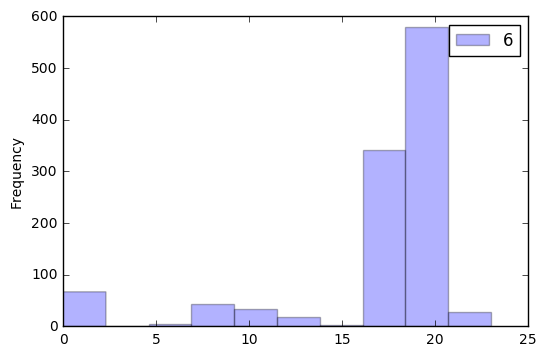

In [14]:
b11=m6[m6['dia']==6]
b12=b11.groupby('dia')['idxmax']
b12.plot.hist(alpha=0.3,legend=True)

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [51]:
m6['idxmin']=m4[y[1:25]].idxmin(axis=1)
#b13=m6['min'].transpose()
#b13['idxminc']=b13.idxmin(axis=1)
#b13.head()
b20=m6.groupby('año').min()['min']
b20


C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


año
1995     0.000000
1996     0.000000
1997    10.882310
1998    13.847330
1999    18.359530
2000    21.531167
2001    24.822879
2002    26.777682
2003    37.013438
2004    32.252998
2005    27.581415
2006    26.714797
2007    30.173824
2008    29.199135
2009    32.892503
2010    32.024957
2011    33.291100
2012    34.988099
2013    40.415346
2014    38.941951
2015    46.791501
2016    61.100689
Name: min, dtype: float64

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [112]:
indicador = ['{}'.format(n) for n in range(len(m4))]
m4.index = indicador

In [118]:
promediomes=[]
for n in range(len(m3)):
    y=m4.groupby('mes')
    f=m4[list(range(1,25))].loc[y.groups[m4['mes'][n]]].mean()
    promediomes.append(f.mean())


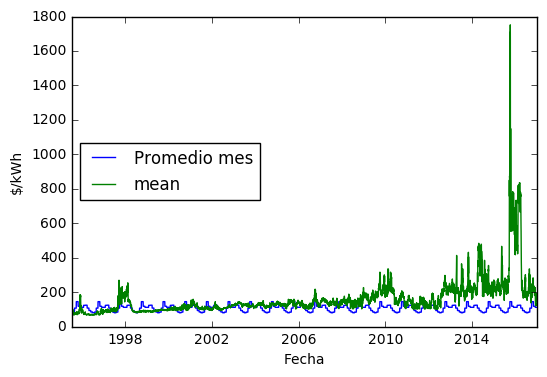

In [115]:
plt.xlabel("Fecha")    
plt.ylabel("$/kWh")
plt.plot(m4['Fecha'],pd.Series(promediomes).values,label='Promedio mes')        
plt.plot(m4['Fecha'],m4['mean']) 
plt.legend(loc="center left")
plt.show()

---